# Assignment

In this assignment, we want to reinforce the concepts we covered in the lecture. Let's first load the required libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc = {'figure.figsize': (10, 8)})
import matplotlib.pyplot as plt
import plotly.express as pxp
import plotly.figure_factory as pff
import plotly.colors as plco

import scipy
import scipy.stats as ss
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols


def _normalize_series(srs:pd.Series):
    mean = srs.mean()
    stdd = srs.std()
    return ((srs - mean) / stdd)

We will be using the automobile mileage data for this assignment.

In [2]:
def read_auto_data(file = "../../data/canadian_cars_2022.csv"):
    'Function to load the auto data set from a .csv file' 

    ## Read the .csv file with the pandas read_csv method
    df = pd.read_csv(file)
    
    ## Split the number of gears from the type of transmission, decode fuel
    df['gears'] = df['transmission'].str.extract(r'([0-9]+)').astype('Int64')
    df['gears'] = df['gears'].fillna(1) # "gearless" continuously_variable vehicles
    df.replace({'fuel':{'X': 'regular_gas', 
                             'Z': 'premium_gas', 
                             'D': 'diesel'}}, inplace = True)
    df['transmission'] = df['transmission'].str.extract(r'([A-Z]+)')
    df.replace({'transmission':{'A': 'automatic', 
                             'AM': 'automated_manual', 
                             'AS': 'automatic_select_shift', 
                             'AV': 'continuously_variable', 
                             'M': 'manual'}}, inplace = True)
    
    ## Remove rows with missing values
    df = df.dropna(axis = 0).reset_index(drop= True)
    return df


auto_df = read_auto_data()
auto_df

,make,short_model_name,overall_length_cm,overall_width_cm,overall_height_cm,wheelbase_cm,curb_weight_kg,weight_distribution_pct_front,vehicle_class,engine_size_l,cylinders,transmission,fuel,fuel_consumption_mpg,smog,full_model_name,gears
0,acura,ilx,462.0,180.0,141.0,267.0,1415.0,60.0,Compact,2.4,4,automated_manual,premium_gas,33,3,ILX 4DR SEDAN,8
1,acura,mdx,504.0,200.0,170.0,289.0,2044.0,60.0,SUV: Small,3.5,6,automatic_select_shift,premium_gas,25,5,MDX 4DR SUV AWD,10
2,acura,rdx,474.0,190.0,167.0,275.0,1830.0,57.0,SUV: Small,2.0,4,automatic_select_shift,premium_gas,29,6,RDX 4DR SUV,10
3,acura,tlx,494.0,191.0,143.0,287.0,1781.0,57.0,Compact,2.0,4,automatic_select_shift,premium_gas,29,7,TLX 4DR SEDAN AWD,10
4,alfa romeo,stelvio,469.0,190.0,165.0,282.0,1660.0,52.0,SUV: Small,2.0,4,automatic,premium_gas,30,3,STELVIO BASE/Ti,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,volvo,v60,478.0,185.0,150.0,287.0,1820.0,56.0,Station wagon: Small,2.0,4,automatic_select_shift,premium_gas,29,7,V60 CROSS COUNTRY 4DR WAGON,8
206,volvo,v90,494.0,189.0,144.0,294.0,1880.0,54.0,Station wagon: Mid-size,2.0,4,automatic_select_shift,premium_gas,30,7,V90 4DR WAGON,8
207,volvo,xc40,443.0,186.0,165.0,270.0,1688.0,59.0,SUV: Small,2.0,4,automatic_select_shift,regular_gas,30,5,XC40 4DR SUV,8
208,volvo,xc60,469.0,190.0,166.0,287.0,1869.0,55.0,SUV: Small,2.0,4,automatic_select_shift,premium_gas,30,5,XC60 4DR SUV,8


Run the following tests on the data:

1. Test whether `fuel_consumption_mpg` and log `fuel_consumption_mpg` (using `np.log10`) follow a normal distribution. Use both a **graphical** method and a **formal** test. For the rest of this exercise, choose between using mpg or log mpg based on which of the two best fits a normal distribution. <span style="color:red" float:right>[5 point]</span>

In [3]:
auto_df['fuel_consumption_mpg_log'] = np.log10(auto_df['fuel_consumption_mpg'])

> Our hypothesis test is:
>
> $H_0$ : The sample follows from a normal distribution
>
> $H_A$ : The sample does not follow a normal distribution

In [4]:
log_test = ss.normaltest(auto_df['fuel_consumption_mpg_log'])
raw_test = ss.normaltest(auto_df['fuel_consumption_mpg'])
print(f"Using Normal Test\nThe data alone have a statistic of {raw_test.statistic} and a p-value of {raw_test.pvalue}\nThe log data have a statistic of {log_test.statistic} and a p-value of {log_test.pvalue}")

raw_test = ss.kstest(_normalize_series(auto_df['fuel_consumption_mpg']),'norm')
log_test = ss.kstest(_normalize_series(auto_df['fuel_consumption_mpg_log']),'norm')
print(f"Using KS Test\nThe data alone have a statistic of {raw_test.statistic} and a p-value of {raw_test.pvalue}\nThe log data have a statistic of {log_test.statistic} and a p-value of {log_test.pvalue}")

Using Normal Test
The data alone have a statistic of 91.20255299411163 and a p-value of 1.568979429092282e-20
The log data have a statistic of 13.918297130734956 and a p-value of 0.0009499050123511804
Using KS Test
The data alone have a statistic of 0.12538539944094895 and a p-value of 0.0024539507555044883
The log data have a statistic of 0.08434605473388357 and a p-value of 0.09509919746888151


In [5]:
fig=pff.create_distplot([auto_df['fuel_consumption_mpg']],['fuel_consumption_mpg'], curve_type='normal', bin_size=1)
fig.update_traces(marker=dict(line_width=0.25, line_color="black"))
# fig.add_vline(raw_test.statistic)


In [6]:
fig=pff.create_distplot([auto_df['fuel_consumption_mpg_log']],['fuel_consumption_mpg_log'], curve_type='normal',bin_size=0.01)
fig.update_traces(marker=dict(line_width=0.25, line_color="black"))
# fig.add_vline(log_test.statistic)

/var/folders/72/0bcyzdyx7h3cvbp3wdsv12gh0000gn/T/ipykernel_23505/3574554583.py:8: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



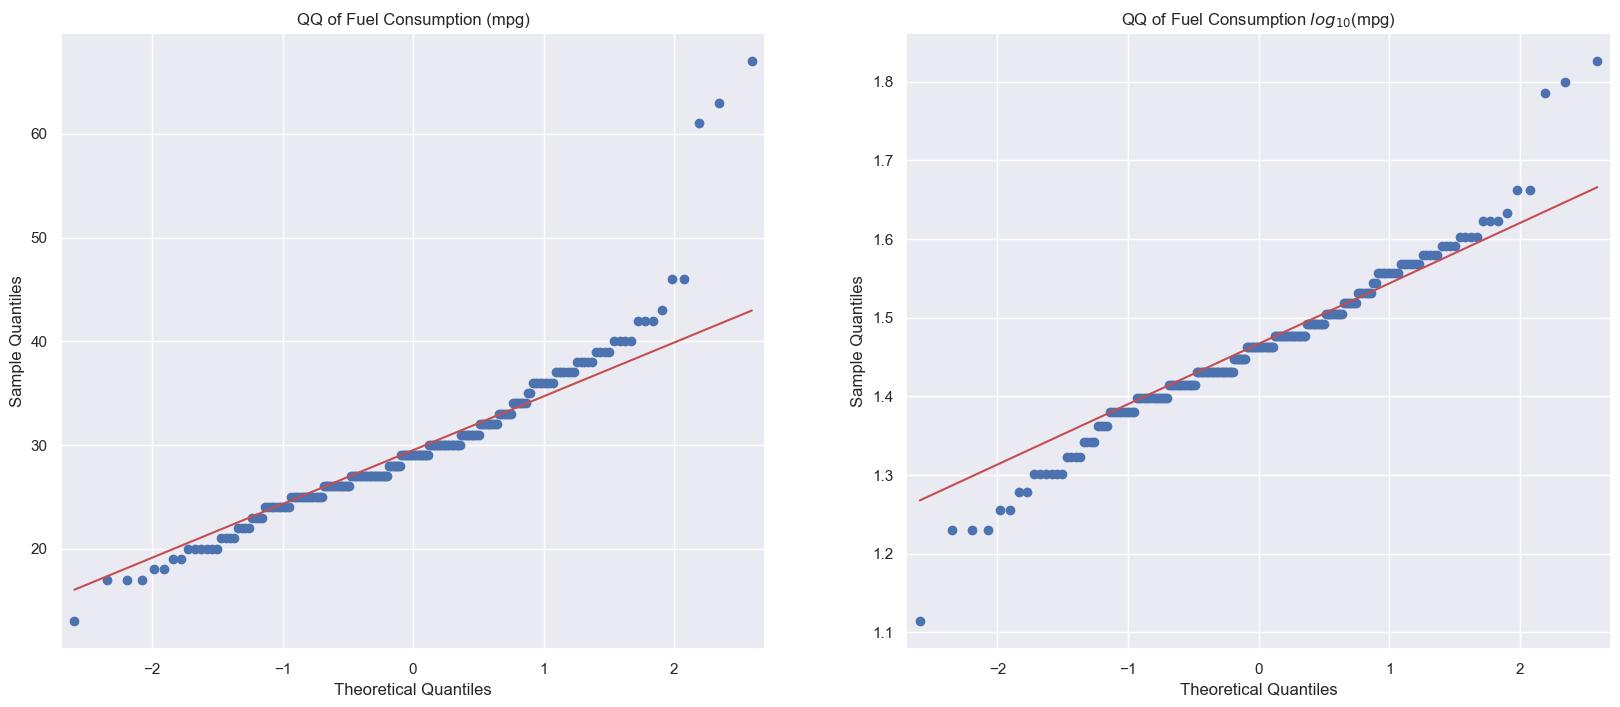

In [7]:
fig,ax=plt.subplots(1,2)
plotfrm = auto_df.copy() # preventing unknown problems on JupyterHub
sm.qqplot(plotfrm['fuel_consumption_mpg'],line='q',ax=ax[0])
sm.qqplot(plotfrm['fuel_consumption_mpg_log'],line='q',ax=ax[1])
ax[0].set_title("QQ of Fuel Consumption (mpg)")
ax[1].set_title("QQ of Fuel Consumption $log_{10}$(mpg)")
fig.set_figwidth(20)
fig.figure.show()

>### Conclusions of normality of fuel consumption and $log_{10}$(fuel consumption)
>
>Based on the results from the Normal test and KS test, we fully reject the raw data and would need to reject the $log$ data as well, but it is closer to a normal distribution then the raw data. 
>
>> #### Thus the `log10` data to be the closest to a normal distribution, so I will use the `fuel_consumption_mpg_log` data going forward.
>
>>> Also, this reference (https://docs.scipy.org/doc/scipy/tutorial/stats/hypothesis_normaltest.html) is how I know that the Normal Test shows the above

We can see from the QQ plots that the data appears to be right-tailed, with a few cars having very high mileage. Using a log transformation reduces the skew, but it also pushes the lowest mileages off the normal distribution curve as well.

2. Test if the fuel consumption is significantly different for the following populations of vehicles

- "Big 3" North American brands ('buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ford',  'gmc', 'jeep', 'lincoln') compared with brands that began in other countries
- Vehicles with 1 gear vs many gears
- Vehicle with greater than median height vs less than or equal the median height

You are running separate tests for each variable. Use both graphical methods and the formal test. <span style="color:red" float:right>[5 point]</span>

In [8]:
def compare_samples(df1, df2, col='fuel_consumption_mpg_log', labels:list=None, bin_size:int=0.2):
    samp1 = df1[col]
    samp2 = df2[col]
    test_res = ss.ttest_ind(samp1,samp2)
    fig = pff.create_distplot([samp1,samp2],labels if labels else None,curve_type='kde',bin_size=bin_size,show_rug=False)
    fig.update_traces(marker=dict(colorscale=plco.qualitative.D3,line_width=0.25, line_color="black"))
    # fig.add_vline(test_res.statistic)
    fig.add_vline(samp1.mean(),line_width=3, line_dash="dashdot", line_color=plco.qualitative.D3[0])
    fig.add_vline(samp2.mean(),line_width=3, line_dash="dashdot", line_color=plco.qualitative.D3[1])
    
    return fig, test_res

> ### Our hypotheses for the Big3 comparison:
>
> $H_0$ : The mean fuel consumption of the US Big3 automakers is not different then other automakers.
>
> $H_A$ : The mean fuel consumption of the US Big3 automakers is significantly different then other automakers.

In [9]:
big3 = auto_df[auto_df.make.isin(['buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ford',  'gmc', 'jeep', 'lincoln'])]
not_big3 = auto_df[auto_df.make.isin([m for m in auto_df.make.unique().tolist() if m not in ('buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ford',  'gmc', 'jeep', 'lincoln')])]
fig, results = compare_samples(big3,not_big3,labels=['Big3','Not Big3'],bin_size=.01)
fig.update_layout(
    title=f"""Big3 vs Others fuel consumption T-test results: <br>
<sup>stat : {results.statistic:0.3f} | T-crit(0.95) : {scipy.stats.t.ppf(0.95, results.df):0.3f} & pvalue : {results.pvalue:0.5f}</sup>""",
    height=700,
)
fig.show()

> #### Big3 vs Others conclusions
> 
> While the distribution of samples is more concentrated amongst the US Big3 automakers, the differences between means is __not enough__ to reject the null hypothesis that there is no difference between these groups.
> 
> So we _accept the null hypothesis_

> ### Our hypotheses for the gearless vs geared comparison:
>
> $H_0$ : The mean fuel consumption of the gearless vehicles is not different then geared vehicles.
>
> $H_A$ : The mean fuel consumption of the gearless vehicles is significantly different then geared vehicles.

In [10]:
gear_less = auto_df[auto_df.gears == 1]
gear_more = auto_df[auto_df.gears > 1]
fig, results = compare_samples(gear_less,gear_more,labels=['1 Gear','>1 Gear'],bin_size=.01)
fig.update_layout(
    title=f"""Gearless vs Geared fuel consumption T-test results: <br>
<sup>stat : {results.statistic:0.3f} | T-crit(0.95) : {scipy.stats.t.ppf(0.95, results.df):0.3f} & pvalue : {results.pvalue:0.5E}</sup>""",
    height=700,
)
fig.show()

> #### 1 Gear vs >1 Gear (aka Gearless vs Geared) conclusions
> 
> The plot and the T-test clearly ___reject the null hypothesis___ that there is no difference. Thus, ___accepting the null hypothesis___ that having a 'continuously variable' transmission (gearless) vehicle significantly effects expected fuel consumption.

> ### Our hypotheses for the height comparison:
>
> $H_0$ : The mean fuel consumption of the US Big3 automakers is not different then other automakers.
>
> $H_A$ : The mean fuel consumption of the US Big3 automakers is significantly different then other automakers.

In [11]:
tall = auto_df[auto_df.overall_height_cm > auto_df.overall_height_cm.median()]
short = auto_df[auto_df.overall_height_cm <= auto_df.overall_height_cm.median()]
fig, results = compare_samples(tall,short,labels=['>Median height','<Median height'],bin_size=.01)
fig.update_layout(
    title=f"""Short vs Tall fuel consumption T-test results: <br>
<sup>stat : {results.statistic:0.3f} | T-crit(0.95) : {scipy.stats.t.ppf(0.95, results.df):0.3f} & pvalue : {results.pvalue:0.5f}</sup>""",
    height=700,
)
fig.show()

> #### <Median height & >Median height conclusions
> 
> This one is a little more subtle, as the p-value is small (1.1E-4) but the statistic is _very_ low (-3.9) so we have to ___accept the null hypothesis___ that the fuel consumption is not significantly different between vehicles shorter or equal to the median height vs vehicles taller then the median height.

3. Apply ANOVA and Tukey's HSD test to the miles per gallon to compare the fuel economy of autos for different vehicle classes. Restrict the analysis to just the `vehicle_class` categories having 10 or more cars in the data. Note that ANOVA and Tukey's HSD are **two separate tests**! <span style="color:red" float:right>[5 point]</span>

ANOVA tests whether there are any significant differences between any of the categories: 

$H_0: $ are categories have the same mean mpg

$H_1: $ at least one category has a different mean mpg

If the p-value for ANOVA is significant, then we can perform a Tukey's HSD test to see which categories are significantly different from each other.

In [12]:
classes = auto_df['vehicle_class'].value_counts()[auto_df['vehicle_class'].value_counts() >= 10].index.to_list()
classes_mpg = auto_df.where(auto_df['vehicle_class'].isin(classes))[['vehicle_class','fuel_consumption_mpg_log','fuel_consumption_mpg']].dropna()
display(classes,classes_mpg.describe())

['SUV: Small',
 'SUV: Standard',
 'Mid-size',
 'Compact',
 'Full-size',
 'Subcompact',
 'Two-seater']

,fuel_consumption_mpg_log,fuel_consumption_mpg
count,181.000000,181.000000
mean,1.462401,29.751381
std,0.098131,6.995956
min,1.113943,13.000000
25%,1.414973,26.000000
50%,1.462398,29.000000
75%,1.518514,33.000000
max,1.826075,67.000000


In [13]:
model = ols('fuel_consumption_mpg_log ~ C(vehicle_class)', data = classes_mpg).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

                     df    sum_sq   mean_sq          F        PR(>F)
C(vehicle_class)    6.0  0.518852  0.086475  12.389421  1.341236e-11
Residual          174.0  1.214480  0.006980        NaN           NaN


> #### ANOVA testing `vehicle_class` conclusion
> 
> Based on the p-value (1.3E-11) we certainly have a group that is significantly different then the other categories, ___rejecting the null hypothesis___. Now on to using Tukey's HSD to determine which groups stand apart.

> Our generalized hypotheses for the Tukey's HSD comparison:
>
> $H_0$ : The mean fuel consumption of `group1` is not different then `group2`.
>
> $H_A$ : The mean fuel consumption of `group1` is significantly different then `group2`.

In [14]:
Tukey_HSD = pairwise_tukeyhsd(classes_mpg['fuel_consumption_mpg_log'],classes_mpg['vehicle_class'])
Tukey_HSD.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Compact,Full-size,-0.0582,0.432,-0.146,0.0296,False
Compact,Mid-size,-0.0326,0.8597,-0.1084,0.0433,False
Compact,SUV: Small,-0.0548,0.161,-0.1198,0.0102,False
Compact,SUV: Standard,-0.1604,0.0,-0.2307,-0.0901,True
Compact,Subcompact,-0.0891,0.0786,-0.1835,0.0054,False
Compact,Two-seater,-0.1553,0.0001,-0.2526,-0.0579,True
Full-size,Mid-size,0.0256,0.969,-0.0575,0.1088,False
Full-size,SUV: Small,0.0035,1.0,-0.07,0.0769,False
Full-size,SUV: Standard,-0.1022,0.0026,-0.1804,-0.024,True
Full-size,Subcompact,-0.0308,0.9696,-0.1313,0.0696,False


In [15]:
classes_mpg.groupby('vehicle_class')['fuel_consumption_mpg'].describe()

,count,mean,std,min,25%,50%,75%,max
vehicle_class,,,,,,,,
Compact,19.0,34.894737,5.445638,27.0,31.00,34.0,38.50,46.0
Full-size,14.0,31.857143,12.075768,17.0,24.75,29.5,35.75,67.0
Mid-size,25.0,33.000000,8.741663,20.0,27.00,32.0,38.00,63.0
SUV: Small,65.0,30.661538,4.039945,24.0,28.00,30.0,32.00,46.0
SUV: Standard,37.0,24.108108,3.470381,17.0,21.00,25.0,27.00,30.0
Subcompact,11.0,28.545455,5.279463,20.0,26.00,30.0,30.50,40.0
Two-seater,10.0,25.200000,7.495184,13.0,20.50,24.0,31.75,36.0


#### Tukey's Test results

Let's break out the list of groups that differ significantly ___(rejecting the null hypothesis = True)___:
```
   Compact | SUV: Standard
   Compact | Two-seater
 Full-size | SUV: Standard
  Mid-size | SUV: Standard
  Mid-size | Two-seater
SUV: Small | SUV: Standard
SUV: Small | Two-seater
```
Based on that list, we can see that `SUV: Standard` and `Two-seater` (means of 24.1 (n=37) & 25.2 (n=10) respectively) are likely to be significantly lower then `Compact`, `Mid-size`, `SUV: Small`, and `Full-size` vs `SUV: Standard` but that may be because of the outlier of 67 within `Full-size`.

Overall I believe that the `SUV: Standard` & `Two-seater` classes to be significantly different then the `Compact`, `Mid-size`, & `SUV: Small` classes, at least for this data sample.

4. Graphically explore the differences in mileage of the cars with different body styles. If any of these relationships are statistically significant (as suggested by Tukey's HSD), examine the sample size and decide if they should be considered practically significant. <span style="color:red" float:right>[5 point]</span>

In [16]:
fig = pxp.box(classes_mpg,x='vehicle_class',y='fuel_consumption_mpg',color='vehicle_class',title="MPG by Vehicle Class")
fig.update_layout(height=900)
fig.show()

> ### Difference conclusions based on Tukey's HSD and the above box & whisker plot

Given the distribution and number of observations of the `Two-seater` class, I don't believe it is practically significant. That said, the number of observations and small distribution of the `SUV: Standard` class, I do believe those differences (`Compact`, `Mid-size`, `SUV: Small`) to likely be practically different and likely start to separate given a larger dataset/sample.

   
Note that to get full grade, for graphical tests you should include commentary on what your plot is showing. For formal tests should include the following:
- begin by naming the test you are using
- begin by clearly stating the null and alternative hypotheses
- run the test and report the statistic and p-value
- based on the p-value you should state the conclusion

# End of assignment